dataframe shape:  (150000, 11)


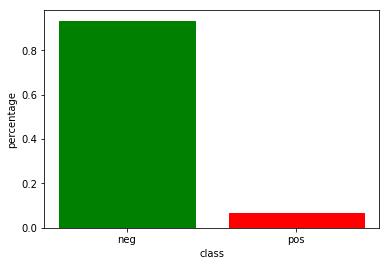

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./data/cs-training.csv', sep=',', index_col=0)
print("dataframe shape: ", data.shape)
total = len(data)
class_count = data['SeriousDlqin2yrs'].value_counts()
class_index = class_count.index
class_percent = class_count.values/total
barlist = plt.bar(class_index,class_percent)
barlist[0].set_color('g')
barlist[1].set_color('r')
plt.xticks(class_index, ['neg','pos'])
plt.xlabel("class")
plt.ylabel("percentage")
plt.show()

###### The dataset has very imbalanced classes. There are only 6.68% of positive samples. 

In [91]:
null_value = data.isnull().sum(axis=1)
null_count = np.count_nonzero(null_value.values)

print("Total # of records in training dataset is: ", total)
print("Total # of records in training dataset with null value is: ", null_count)

Total # of records in training dataset is:  150000
Total # of records in training dataset with null value is:  29731


###### Around 19.8% of records with missing values. So we rather deal with the missing value than simply remove the records. 

In [2]:
#general description of the data
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


age  column
total number of null value is:  0 ( 0.0 )


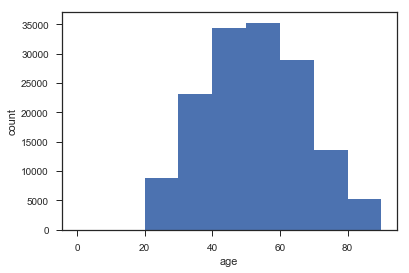

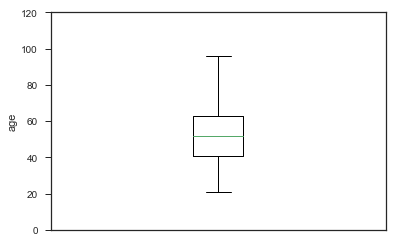

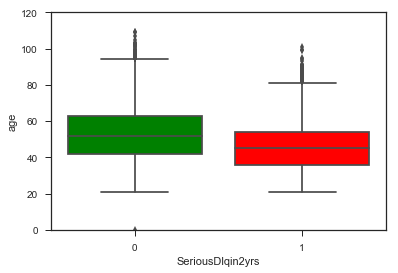

In [108]:
import seaborn as sns
#explore and visualize the value of each columns (missing values, distribution, outliers)
def explore_column_value(clabel,bins,yrange):
    print(clabel,' column')
    null_value = data[clabel].isnull().sum()
    print('total number of null value is: ', null_value,'(', null_value/total,')')
    cdata = data[data[clabel].notnull()]
    #value_count = cdata[clabel].value_counts()
    plt.figure()
    #plt.bar(value_count.index,value_count.values)
    plt.hist(cdata[clabel], bins=bins, range=yrange)
    plt.xlabel(clabel)
    plt.ylabel("count")
    plt.figure()
    plt.boxplot(cdata[clabel])
    plt.ylim(yrange)
    plt.ylabel(clabel)
    plt.xticks([])
    plt.show()
    ax=sns.boxplot( x=cdata["SeriousDlqin2yrs"], y=cdata[clabel])
    ax.set_ylim(yrange)
    ax.artists[0].set_facecolor('green')
    ax.artists[1].set_facecolor('red')
    
explore_column_value('age',np.arange(0,100,10),[0,120])

###### The age feature has no missing value. It has some potential outlier values such as 0, 100. We can try to take the log of the age feature Or discretize the age value to 10-year buckets to reduce the effect of outlier values. We also find that the younger people tend to have higher delingquency risk. 

NumberOfDependents  column
total number of null value is:  3924 ( 0.02616 )


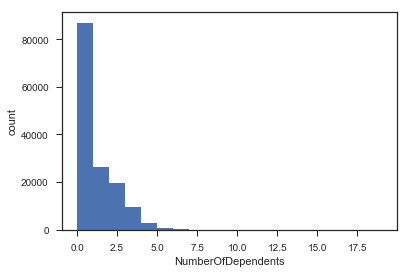

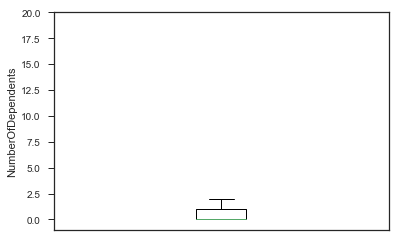

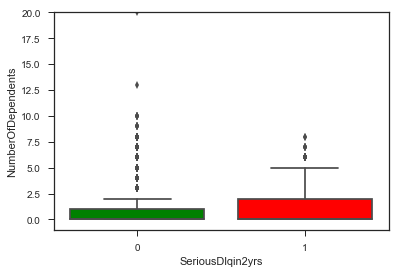

In [109]:
explore_column_value('NumberOfDependents',np.arange(0,20,1),[-1,20])


###### The dependent feature has some missing value. Majority of people have no dependents. Some of the records has outlier values for example have more than 10 dependents. We can add another feature to indicate a person has or does not have dependents. We can also take the log of the dependent value to reduce the effect of outliers.  People with more dependents have slightly higher delingquency risk. 

MonthlyIncome  column
total number of null value is:  29731 ( 0.198206666667 )
min value:  0.0
max value:  3008750.0


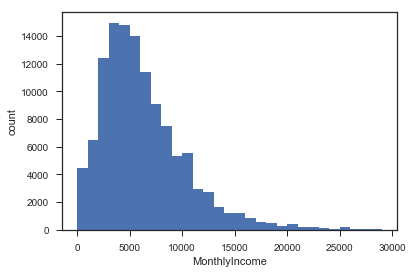

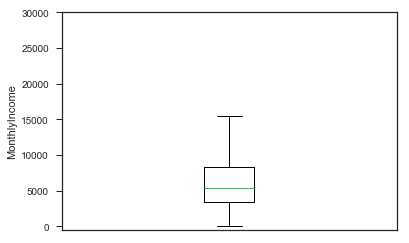

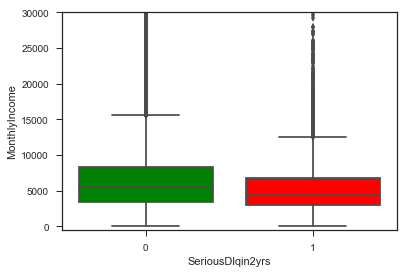

In [94]:
explore_column_value('MonthlyIncome',np.arange(0,30000,1000), [-500,30000])

###### Monthly income feature has lots of missing values, and the data is very noisy with lots of extremely high (unrealistic) values. We can add another feature to indicate a person has or does not have income information. We can also try to run data imputation to this feature. We can also take the log of the income value to reduce the effect of outliers. People with lower income tend to have slightly higher delingquency risk. 

NumberOfOpenCreditLinesAndLoans  column
total number of null value is:  0 ( 0.0 )


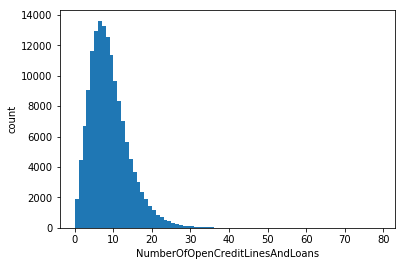

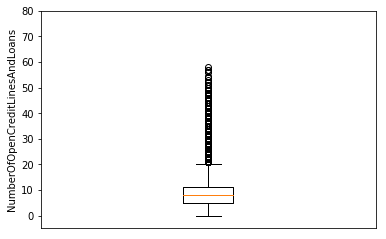

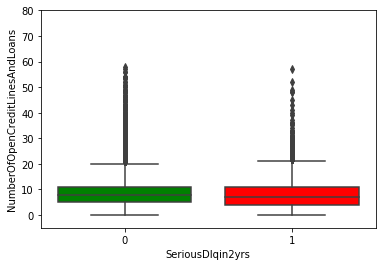

In [116]:
explore_column_value('NumberOfOpenCreditLinesAndLoans',np.arange(0,80,1), [-5,80])

###### The # of open credit line feature has no missing value. It has some potential outlier values such as 50,60. We can try to take the log of this feature to reduce the effect of outlier values. We find the # of open credit line has roughly no correlation with the delingquency risk. 

NumberRealEstateLoansOrLines  column
total number of null value is:  0 ( 0.0 )


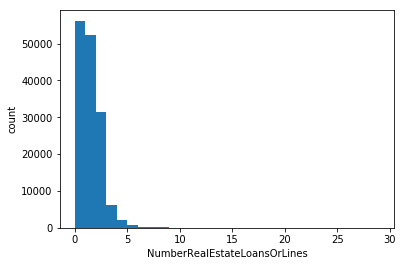

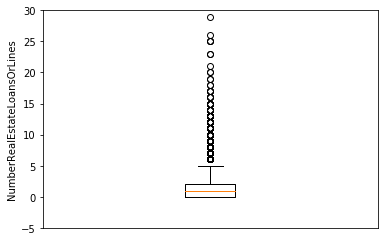

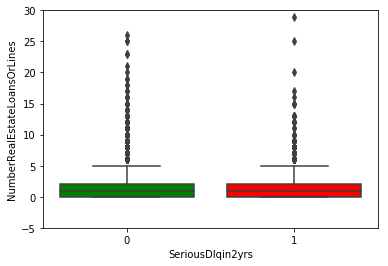

In [119]:
explore_column_value('NumberRealEstateLoansOrLines',np.arange(0,30,1), [-5,30])

###### The # of open loan line feature has no missing value. Many of the sample have no loan line. We can introduce another feature to indicate whether a person has or does not have open loan line. It has some potential outlier values such as 20,30. We can try to take the log of this feature to reduce the effect of outlier values. We find the # of open credit line has roughly no correlation with the delingquency risk. 

NumberOfTime30-59DaysPastDueNotWorse  column
total number of null value is:  0 ( 0.0 )


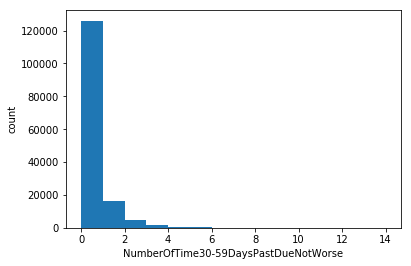

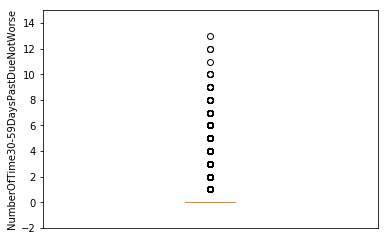

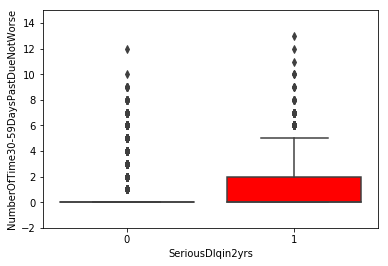

In [122]:
explore_column_value('NumberOfTime30-59DaysPastDueNotWorse',np.arange(0,15,1), [-2,15])

###### The NumberOfTime30-59DaysPastDueNotWorse feature has no missing value. It has two abnormal values 96,98. It seems the NumberOfTime30-59DaysPastDueNotWorse is a strong indicater of the delingquency risk. 

NumberOfTime60-89DaysPastDueNotWorse  column
total number of null value is:  0 ( 0.0 )


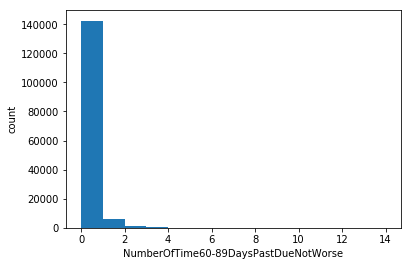

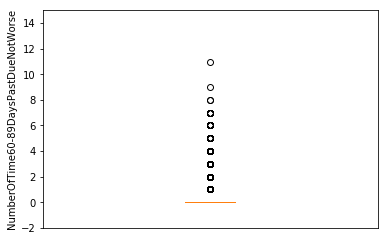

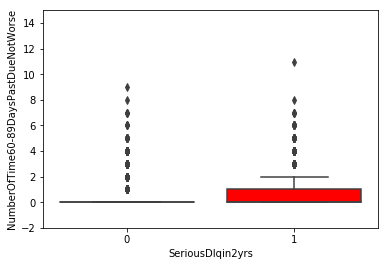

In [124]:
explore_column_value('NumberOfTime60-89DaysPastDueNotWorse',np.arange(0,15,1), [-2,15])

###### The NumberOfTime60-89DaysPastDueNotWorse feature has no missing value. Majority sample has zero value of this feature. It has two abnormal values 96,98. It seems the NumberOfTime60-89DaysPastDueNotWorse is a strong indicater of the delingquency risk. 

NumberOfTimes90DaysLate  column
total number of null value is:  0 ( 0.0 )


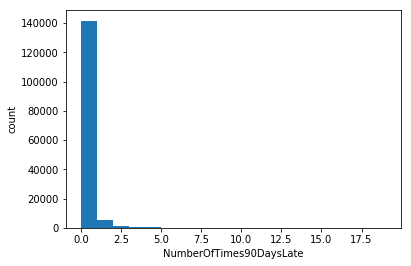

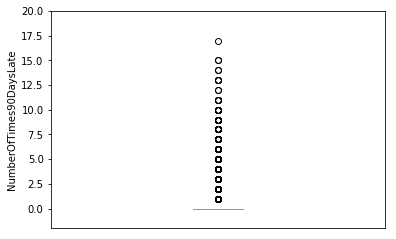

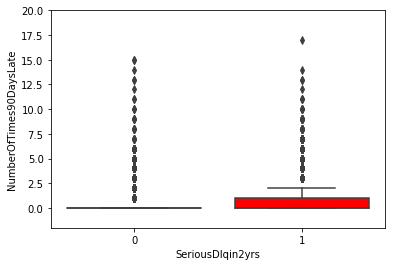

In [127]:
explore_column_value('NumberOfTimes90DaysLate',np.arange(0,20,1), [-2,20])

###### Similar to the previous feature, the NumberOfTimes90DaysLate feature has no missing value. Majority sample has zero value of this feature. It has two abnormal values 96,98, It is a strong indicater of the delingquency risk. 

DebtRatio  column
total number of null value is:  0 ( 0.0 )


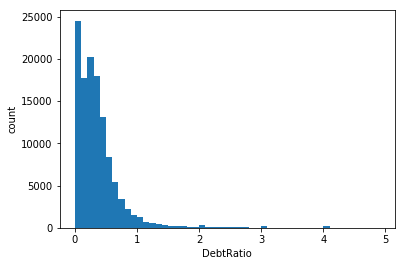

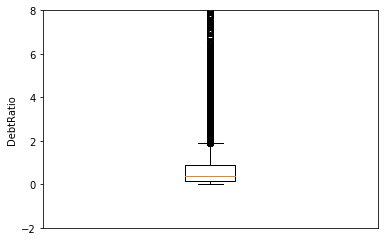

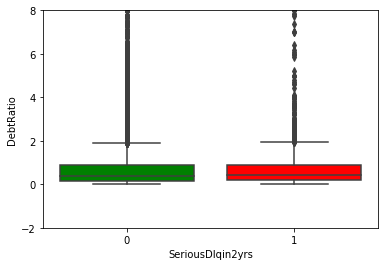

In [131]:
explore_column_value('DebtRatio',np.arange(0,5,0.1), [-2,8])

###### Even thought the DebitRatio feature is a percentage value, it has lots of outlier values over 1 (Some could be extremly large). Could it be caused by the missing income data?? Again, it seems not a very good indicater of the delingquency risk.

RevolvingUtilizationOfUnsecuredLines  column
total number of null value is:  0 ( 0.0 )


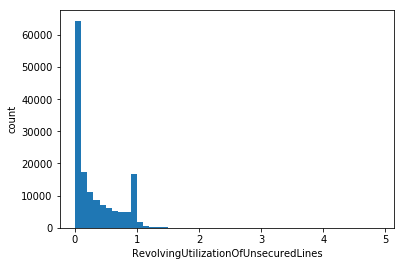

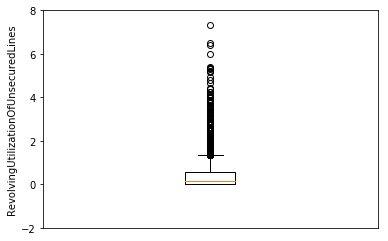

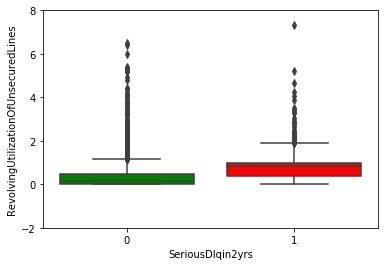

In [133]:
explore_column_value('RevolvingUtilizationOfUnsecuredLines',np.arange(0,5,0.1), [-2,8])

###### The RevolvingUtilizationOfUnsecuredLines feature is also a percentage value, it also has lots of outlier values over 1(Some could be extremly large). It seems people tend to fully utilize his credit limit have higher delingquency risk.

In [128]:
# simply explore and visualize the correlation between features

# remove null value data
data_notnull = data.dropna().copy()
# add two potentially interesting integer features
data_notnull.loc['NumberOfCreditLine'] = data_notnull['NumberOfOpenCreditLinesAndLoans']-data_notnull['NumberRealEstateLoansOrLines']
data_notnull['PastDue'] = data_notnull['NumberOfTime30-59DaysPastDueNotWorse']+data_notnull['NumberOfTime60-89DaysPastDueNotWorse']+data_notnull['NumberOfTimes90DaysLate']
# simply deal with some extrem values
data_notnull.loc[data_notnull.MonthlyIncome==0,'MonthlyIncome'] = 1
data_notnull.loc[data_notnull.PastDue==0,'PastDue'] = 0.1
data_notnull['LogIncome']=data_notnull['MonthlyIncome'].apply(np.log)
data_notnull['LogPastDue']=data_notnull['PastDue'].apply(np.log)
data_notnull = data_notnull.drop(data_notnull[data_notnull.DebtRatio>5].index)
data_notnull = data_notnull.drop(data_notnull[data_notnull.RevolvingUtilizationOfUnsecuredLines>5].index)

### Examine the correlation between some integer/real features and percentage features

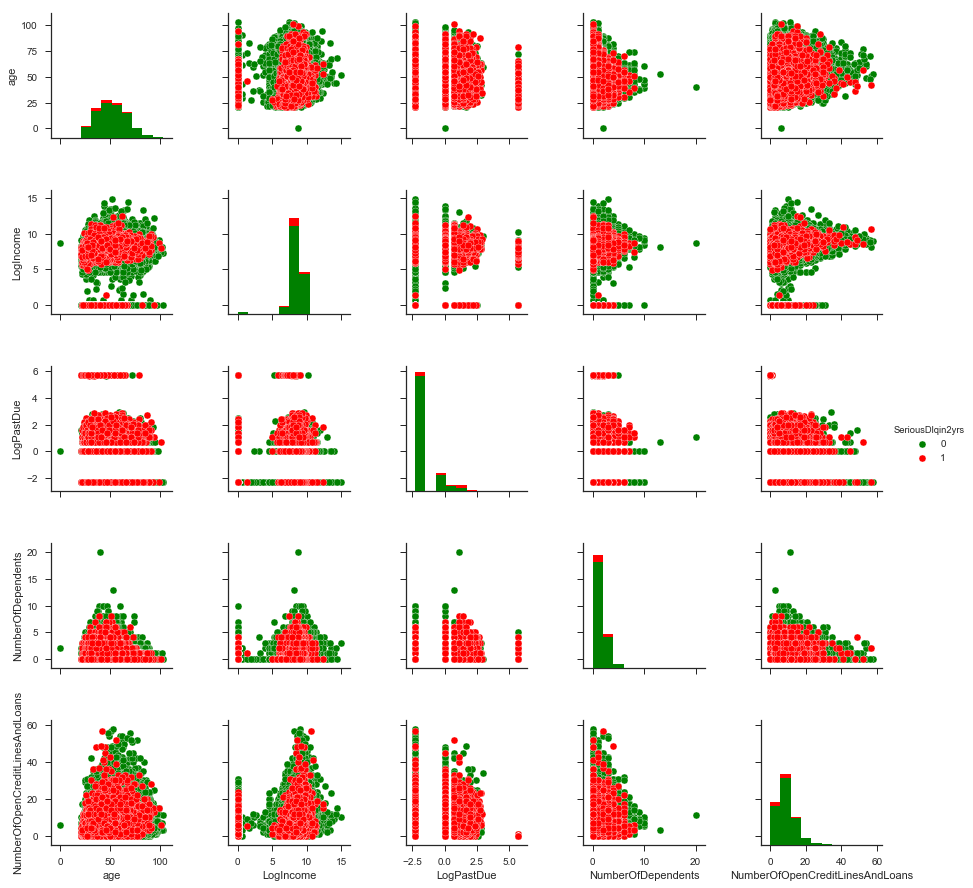

In [22]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data_notnull, vars=['age','LogIncome','LogPastDue','NumberOfDependents',
                                 'NumberOfOpenCreditLinesAndLoans'],
             hue="SeriousDlqin2yrs", palette={0:'green',1:'red'})

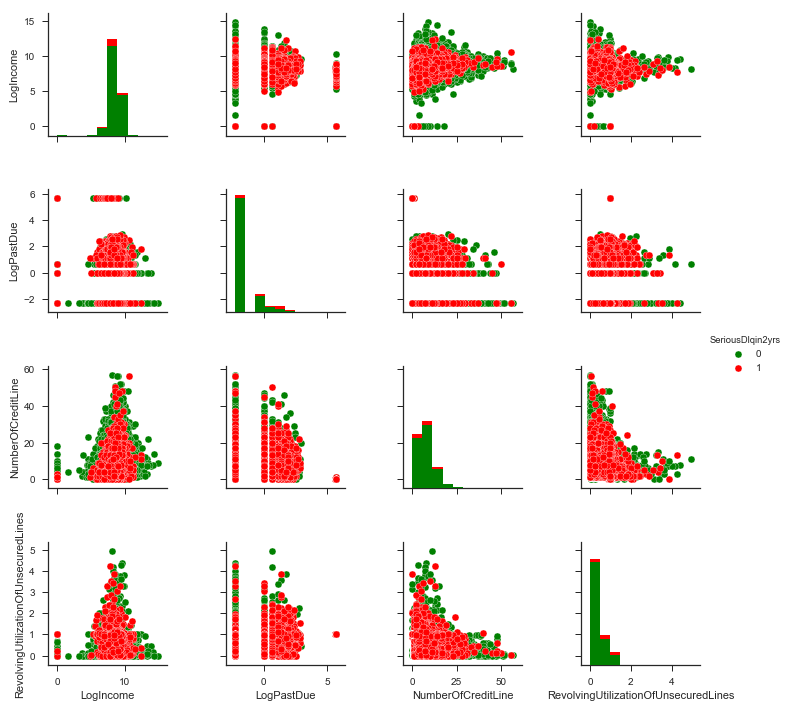

In [33]:
sns.pairplot(data_notnull, vars=['LogIncome','LogPastDue','NumberOfCreditLine',
                                 'RevolvingUtilizationOfUnsecuredLines'],
             hue="SeriousDlqin2yrs", palette={0:'green',1:'red'})

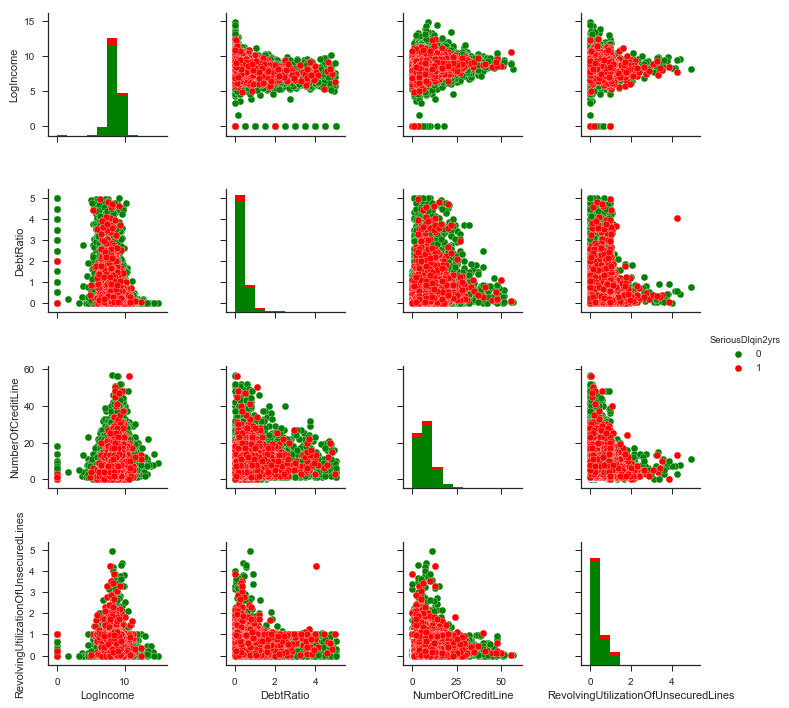

In [34]:
sns.pairplot(data_notnull, vars=['LogIncome','DebtRatio','NumberOfCreditLine',
                                 'RevolvingUtilizationOfUnsecuredLines'],
             hue="SeriousDlqin2yrs", palette={0:'green',1:'red'})

In [4]:
# briefly understanding testing data
data_test = pd.read_csv("./data/cs-test.csv",sep=',',index_col=0)
data_test= data_test.drop(['SeriousDlqin2yrs'],axis=1)
null_value = data.isnull().sum(axis=1)
null_count = np.count_nonzero(null_value.values)
print("data shape: ", data_test.shape)
print("Total # of records in testinging dataset is: ", len(data_test))
print("Total # of records in testing dataset with null value is: ", null_count,'(',null_count/len(data_test),')')
data_test.describe()

data shape:  (101503, 10)
Total # of records in testinging dataset is:  101503
Total # of records in testing dataset with null value is:  29731 ( 0.2929075987901835 )


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000
